In [122]:
import pandas as pd
df = pd.read_csv(r"bank.csv")

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [124]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [125]:
df.drop(['customer_id'],axis=1,inplace=True)

In [126]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in ['country','gender']:
    df[i] = enc.fit_transform(df[i])

In [127]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  int32  
 2   gender            10000 non-null  int32  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [129]:
df.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [130]:
from sklearn.preprocessing import StandardScaler
import numpy as np
for i in df.drop('churn',axis=1):
    scaler = StandardScaler()
    df[i] = scaler.fit_transform(np.array(df[i]).reshape(-1, 1))

In [131]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  float64
 1   country           10000 non-null  float64
 2   gender            10000 non-null  float64
 3   age               10000 non-null  float64
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  float64
 7   credit_card       10000 non-null  float64
 8   active_member     10000 non-null  float64
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [133]:
for i in df.columns:
    df = df[(df[i]<3)&(df[i]>-3)]

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9799 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9799 non-null   float64
 1   country           9799 non-null   float64
 2   gender            9799 non-null   float64
 3   age               9799 non-null   float64
 4   tenure            9799 non-null   float64
 5   balance           9799 non-null   float64
 6   products_number   9799 non-null   float64
 7   credit_card       9799 non-null   float64
 8   active_member     9799 non-null   float64
 9   estimated_salary  9799 non-null   float64
 10  churn             9799 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 918.7 KB


<Axes: >

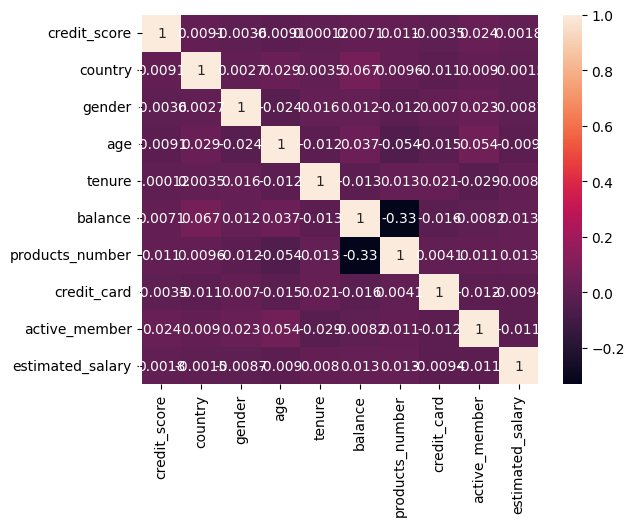

In [135]:
import seaborn as sns

corM = df.drop('churn',axis =1 ).corr()
sns.heatmap(corM,annot = True)

In [136]:
from sklearn.model_selection import train_test_split
X = df.drop('churn',axis=1)
y = df['churn']
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.1)

In [137]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtr,ytr)

LogisticRegression()

In [138]:
lr.score(Xte,yte)

0.8275510204081633

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yte,lr.predict(Xte))
cm

array([[766,  24],
       [145,  45]], dtype=int64)

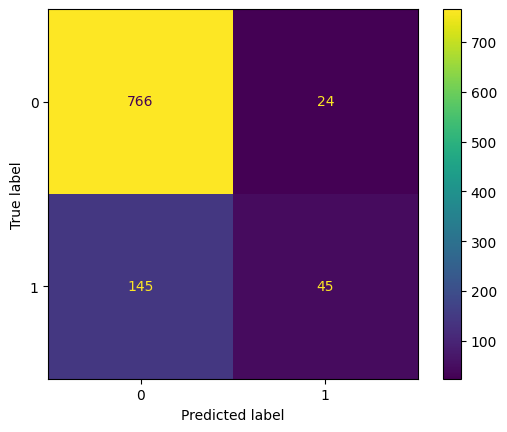

In [140]:
cmdisp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmdisp.plot()

In [141]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(2,10):
    knn = KNeighborsClassifier()
    knn.fit(Xtr,ytr)
    print(knn.score(Xte,yte))

0.85
0.85
0.85
0.85
0.85
0.85
0.85
0.85


In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_true=yte,y_pred=lr.predict(Xte)))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       790
           1       0.65      0.24      0.35       190

    accuracy                           0.83       980
   macro avg       0.75      0.60      0.62       980
weighted avg       0.80      0.83      0.79       980

